## Assignment - Applied Data Science

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from scipy import stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
udemy_df = pd.read_csv('udemy_courses.csv')

In [3]:
udemy_df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [4]:
udemy_df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [5]:
udemy_df.shape

(3678, 12)

In [6]:
udemy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [7]:
udemy_df.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [8]:
udemy_df.shape

(3678, 12)

In [9]:
udemy_df.dtypes

course_id                int64
course_title            object
url                     object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

In [11]:
udemy_df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [12]:
udemy_df["date"]= udemy_df.published_timestamp.astype("datetime64")

In [13]:
udemy_df = udemy_df.drop(["course_id", "url","published_timestamp"], axis=1)

In [14]:
udemy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   course_title      3678 non-null   object        
 1   is_paid           3678 non-null   bool          
 2   price             3678 non-null   int64         
 3   num_subscribers   3678 non-null   int64         
 4   num_reviews       3678 non-null   int64         
 5   num_lectures      3678 non-null   int64         
 6   level             3678 non-null   object        
 7   content_duration  3678 non-null   float64       
 8   subject           3678 non-null   object        
 9   date              3678 non-null   datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 262.3+ KB


In [46]:
np.round(udemy_df['subject'].value_counts(normalize=True),2)


Web Development        0.33
Business Finance       0.32
Musical Instruments    0.18
Graphic Design         0.16
Name: subject, dtype: float64

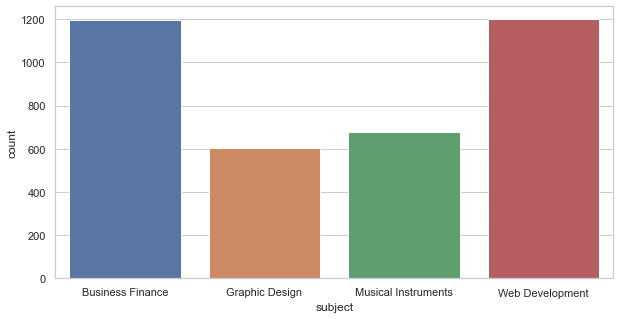

In [50]:
plt.figure(figsize = (10,5))
sns.set(style = "whitegrid")
sns.countplot(data = udemy_df, x = 'subject')
plt.show()

In [52]:
courses_charge=udemy_df['is_paid'].value_counts().reset_index()
fig=px.pie(courses_charge,values='is_paid',names='index',title='Free Vs Paid courses')
fig.update_layout(showlegend=True, width=400)
fig.show()

In [18]:
px.box(udemy_df ,x="price",y="subject")

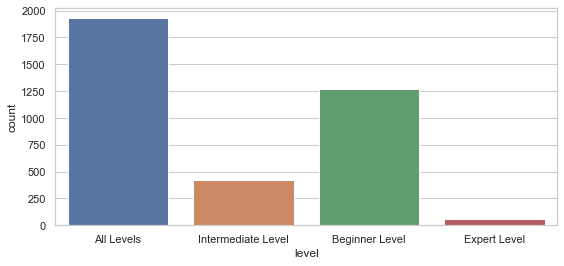

In [19]:
plt.figure(figsize = (9,4))
sns.set(style = "whitegrid")
sns.countplot(data = udemy_df, x = 'level')
plt.show()

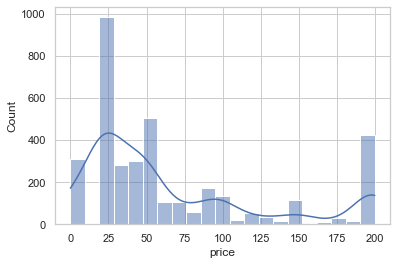

In [20]:
sns.histplot(data=udemy_df,x="price",kde=True);

In [21]:
udemy_df['num_reviews'].describe()

count     3678.000000
mean       156.259108
std        935.452044
min          0.000000
25%          4.000000
50%         18.000000
75%         67.000000
max      27445.000000
Name: num_reviews, dtype: float64

In [22]:
udemy_df['num_lectures'].describe()

count    3678.000000
mean       40.108755
std        50.383346
min         0.000000
25%        15.000000
50%        25.000000
75%        45.750000
max       779.000000
Name: num_lectures, dtype: float64

In [23]:
udemy_df.nlargest(10, 'num_subscribers')

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,date
2827,Learn HTML5 Programming From Scratch,False,0,268923,8629,45,All Levels,10.5,Web Development,2013-02-14 07:03:41
3032,Coding for Entrepreneurs Basic,False,0,161029,279,27,Beginner Level,3.5,Web Development,2013-06-09 15:51:55
3230,The Web Developer Bootcamp,True,200,121584,27445,342,All Levels,43.0,Web Development,2015-11-02 21:13:27
2783,Build Your First Website in 1 Week with HTML5 ...,False,0,120291,5924,30,Beginner Level,3.0,Web Development,2014-04-08 16:21:30
3232,The Complete Web Developer Course 2.0,True,200,114512,22412,304,All Levels,30.5,Web Development,2016-03-08 22:28:36
1896,Free Beginner Electric Guitar Lessons,False,0,101154,1042,95,Beginner Level,4.5,Musical Instruments,2012-06-15 17:00:33
2589,Web Design for Web Developers: Build Beautiful...,False,0,98867,6512,20,All Levels,3.0,Web Development,2015-04-13 18:29:47
2619,Learn Javascript & JQuery From Scratch,True,30,84897,2685,10,All Levels,2.0,Web Development,2013-10-10 15:19:29
3289,Practical PHP: Master the Basics and Code Dyna...,False,0,83737,4598,45,All Levels,6.5,Web Development,2014-07-19 03:02:05
3247,JavaScript: Understanding the Weird Parts,True,175,79612,16976,85,All Levels,11.5,Web Development,2015-03-12 23:19:54


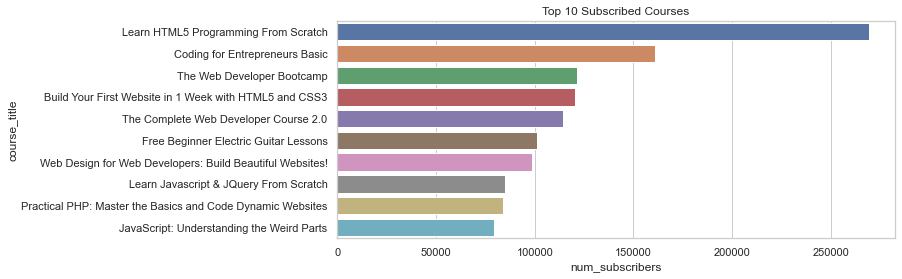

In [55]:
plt.figure(figsize = (10, 4))
sns.barplot(data = udemy_df.nlargest(10, 'num_subscribers'), 
            x = 'num_subscribers', y = 'course_title')
plt.title(label = "Top 10 Subscribed Courses")
plt.show()

In [25]:
udemy_df[udemy_df['is_paid'] == False].nlargest(10, 'num_subscribers')

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,date
2827,Learn HTML5 Programming From Scratch,False,0,268923,8629,45,All Levels,10.5,Web Development,2013-02-14 07:03:41
3032,Coding for Entrepreneurs Basic,False,0,161029,279,27,Beginner Level,3.5,Web Development,2013-06-09 15:51:55
2783,Build Your First Website in 1 Week with HTML5 ...,False,0,120291,5924,30,Beginner Level,3.0,Web Development,2014-04-08 16:21:30
1896,Free Beginner Electric Guitar Lessons,False,0,101154,1042,95,Beginner Level,4.5,Musical Instruments,2012-06-15 17:00:33
2589,Web Design for Web Developers: Build Beautiful...,False,0,98867,6512,20,All Levels,3.0,Web Development,2015-04-13 18:29:47
3289,Practical PHP: Master the Basics and Code Dyna...,False,0,83737,4598,45,All Levels,6.5,Web Development,2014-07-19 03:02:05
3665,Beginner Photoshop to HTML5 and CSS3,False,0,73110,1716,22,All Levels,2.0,Web Development,2012-07-27 12:54:57
2782,Web Development By Doing: HTML / CSS From Scratch,False,0,72932,2575,21,Beginner Level,1.0,Web Development,2013-09-25 00:42:09
3325,HTML and CSS for Beginners - Build a Website &...,False,0,70773,5660,50,All Levels,6.0,Web Development,2015-03-19 19:07:12
492,Bitcoin or How I Learned to Stop Worrying and ...,False,0,65576,936,24,All Levels,8.0,Business Finance,2013-04-20 02:25:22


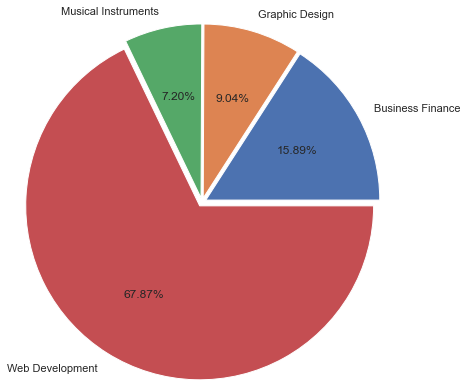

In [28]:
subscriber_count = udemy_df.groupby(['subject']).sum()['num_subscribers']
subject_list = list(udemy_df['subject'].unique())
explode=[0.05]*4
plt.pie(subscriber_count, labels=subject_list, radius=2, autopct='%.2f%%', explode=explode)
plt.show()


In [29]:
avg_data= udemy_df[['price','num_subscribers','num_reviews','num_lectures','content_duration']].mean()
avg_data

price                 66.049483
num_subscribers     3197.150625
num_reviews          156.259108
num_lectures          40.108755
content_duration       4.094517
dtype: float64

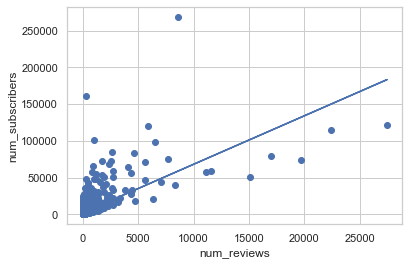

In [56]:
# get the y-axis, y = num_subscribers
df1 = udemy_df['num_subscribers']
y1 = df1.values

# get the x-axis, x = num_reviews
# x_reviews
review_df = udemy_df['num_reviews']
x1 = review_df.values

# draw the trendline
slope, intercept, r, p, std_err = stats.linregress(x1,y1)
def myfunc(x1):
    return slope * x1 + intercept

mymodel = list(map(myfunc,x1))

plt.plot(x1,mymodel)

# draw scatter plot 
plt.xlabel('num_reviews')
plt.ylabel('num_subscribers')
plt.scatter(x1,y1)
plt.show()



# Validation
Scatter plot is a visual way to see the correlation relationship between two variables. To further validate the correlaion, we can calculate the value of Pearson’s Correlation.

1) What is Pearson’s Correlation?

The Pearson’s Correlation coefficient is used to summarise the strength of the linear relationship between two data samples. The value of coefficient ranges from -1 to 1.

Low correlation: value < 0.5 or value > -0.5

High positive correlation: 0.5 <= value <= 1

High negative correlation: -1<= value <= -0.5

No correlation: value = 0

In [31]:
corr, _ = pearsonr(x1,y1)
'Pearson"s correlation: %.3f' % corr

'Pearson"s correlation: 0.650'

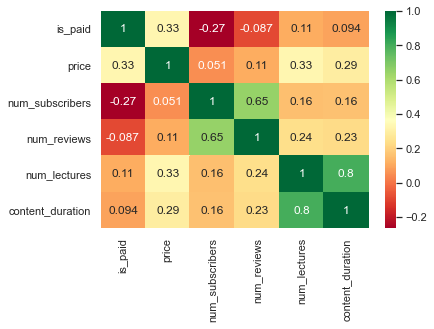

In [54]:
sns.heatmap(udemy_df.corr(), cmap="RdYlGn", annot=True);